In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
data = pd.read_csv("BCData.csv", header = None)

In [29]:
data_orig = data.copy()
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [30]:
XM = X[y == "M"]
XB = X[y == "B"]

In [31]:
nFea = X.shape[1]
averageM = [0 for i in range(nFea)]
rangesM = [0 for i in range(nFea)]
for j in range(nFea):
    averageM[j] = XM.iloc[:,j].mean()
    rangesM[j] = XM.iloc[:,j].max() - XM.iloc[:,j].min() 
    #rangesM[j] = XM.iloc[:,j].std()
    XM.iloc[:,j] -= averageM[j]
    XM.iloc[:,j] = XM.iloc[:,j]/rangesM[j] 
   
averageB = [0 for i in range(nFea)]
rangesB = [0 for i in range(nFea)]
for j in range(XB.shape[1]):
    averageB[j] = XB.iloc[:,j].mean()
    rangesB[j] = XB.iloc[:,j].max() - XB.iloc[:,j].min() 
    #rangesB[j] = XB.iloc[:,j].std()
    XB.iloc[:,j] -= averageB[j]
    XB.iloc[:,j] = XB.iloc[:,j]/rangesB[j] 

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [32]:
Krange = [k for k in range(2,30)]

thetaM = [0 for i in range(len(Krange))]
thetaB = [0 for i in range(len(Krange))]

for K in Krange:
    kmM = KMeans(n_clusters = K,  random_state = 2)
    kmM.fit(XM)
    centroidM = kmM.cluster_centers_
    labelsM = kmM.labels_
    thetaM[K-Krange[0]] = metrics.silhouette_score(XM, labelsM)

for K in Krange:
    kmB = KMeans(n_clusters = K,  random_state = 4)
    kmB.fit(XB)
    centroidB = kmB.cluster_centers_
    labelsB = kmB.labels_
    thetaB[K-Krange[0]] = metrics.silhouette_score(XB, labelsB)
    

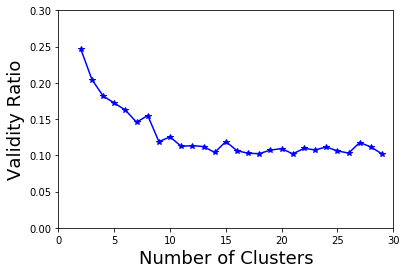

In [33]:
plt.plot(Krange, thetaM, '-*b')
plt.xlabel("Number of Clusters", fontsize=18)
plt.ylabel("Validity Ratio", fontsize=18)
plt.axis([0, 30, 0, 0.3])
plt.savefig('Malignant_VR_K_Sil.png', format='png')
plt.savefig('Malignant_VR_K_Sil.eps', format='eps')

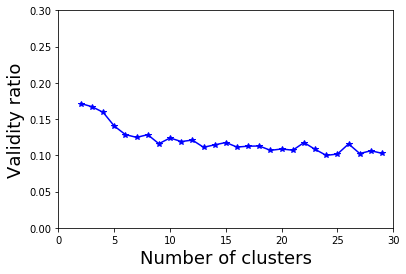

In [34]:
plt.plot(Krange, thetaB, '-*b')
plt.xlabel("Number of clusters", fontsize=18)
plt.ylabel("Validity ratio", fontsize=18)
plt.axis([0, 30, 0, 0.3])
plt.savefig('Benign_VR_K_Sil.png', format='png')
plt.savefig('Benign_VR_K_Sil.eps', format='eps')

In [35]:
XM.iloc[:,0].sum()
XB.iloc[:,0].sum()
X.iloc[:,0].sum() - (len(XB)*averageB[0] + len(XM)*averageM[0])

9.0949470177292824e-13